In [59]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

In [60]:
# Load data
data = pd.read_csv("./diabetes.csv") 
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
data.shape
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
data=data.drop_duplicates()

In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


In [67]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

<Axes: xlabel='Outcome', ylabel='count'>

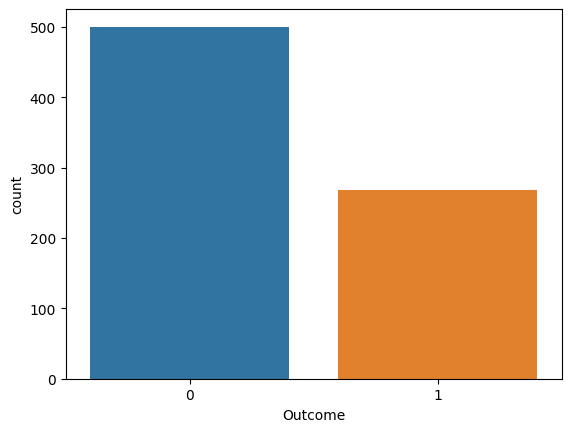

In [68]:
sns.countplot(x='Outcome', data=data)

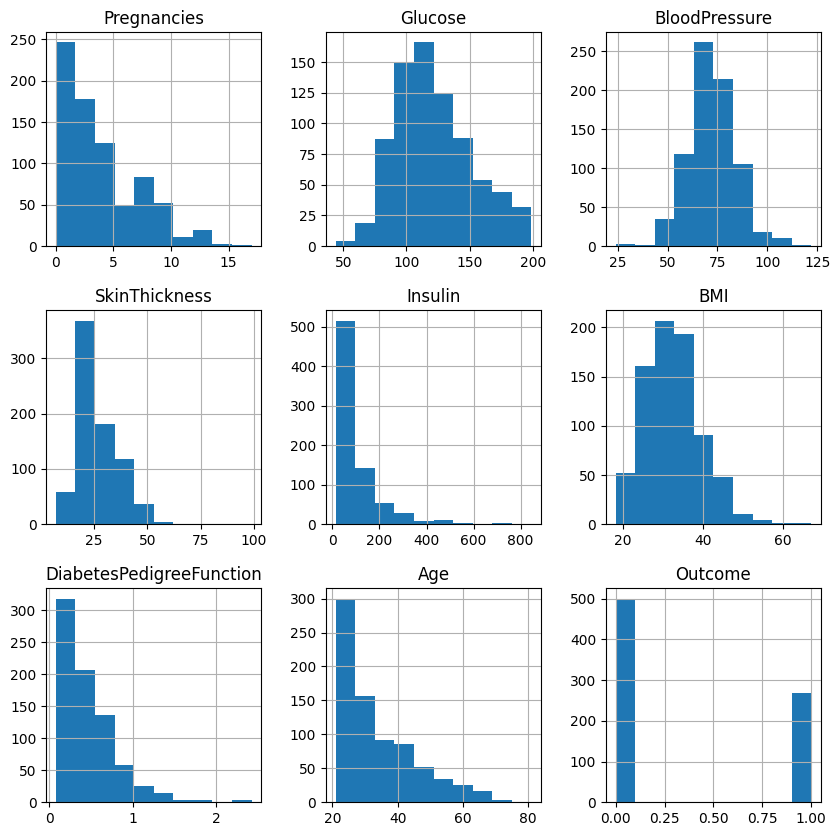

In [69]:
import matplotlib.pyplot as plt
data.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

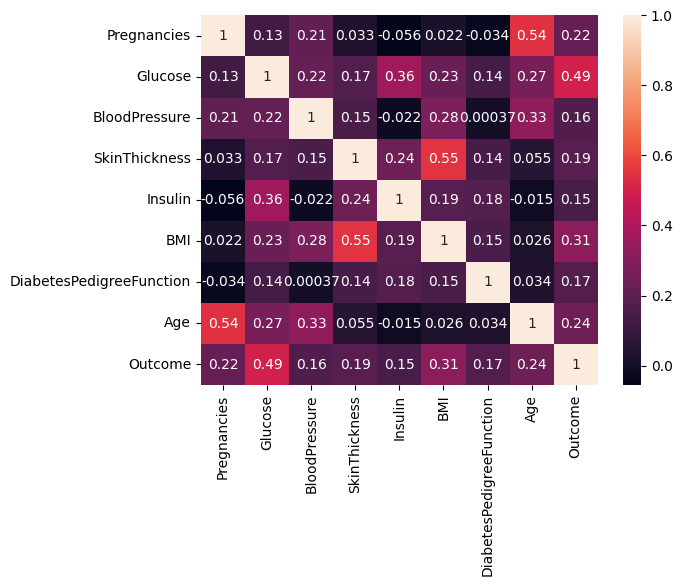

In [70]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

In [71]:
#here bloodpressure, insulin,DiabetesPedigreeF have the least correlation so drop them
data_selected=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [72]:
#Outlier Handling
from sklearn.preprocessing import QuantileTransformer
x=data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()


c:\Users\OMEN 0136AX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\OMEN 0136AX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [73]:
X=data_new.drop(["Outcome"],axis="columns")
y=data_new["Outcome"]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
# Define a function to evaluate KNN with different metrics and K values
def evaluate_knn(X_train, X_test, y_train, y_test, distance_metrics, k_values):
    for metric in distance_metrics:
        for k in k_values:
            # Create KNN model with specified metric and K
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)  # Adapt for regression
            knn.fit(X_train, y_train)

            # Evaluate train and test accuracy
            train_accuracy = accuracy_score(y_train, knn.predict(X_train))  # Adjust metric for regression
            test_accuracy = accuracy_score(y_test, knn.predict(X_test))  # Adjust metric for regression
            print(f"Metric: {metric}, K: {k}, Train accuracy: {train_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")


In [76]:
# Split data into training and testing sets
# Set distance metrics and K values to evaluate
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = range(1, 11)

# Evaluate and find optimal K
evaluate_knn(X_train, X_test, y_train, y_test, distance_metrics, k_values)

# # Rebuild model with optimal K and metric (based on test accuracy results)
# best_k = ...  # Choose based on test accuracy results
# best_metric = ...  # Choose based on test accuracy results
# knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)  # Adapt for regression
# knn.fit(X_train, y_train)


Metric: euclidean, K: 1, Train accuracy: 1.0000, Test accuracy: 0.7338
Metric: euclidean, K: 2, Train accuracy: 0.8322, Test accuracy: 0.7403
Metric: euclidean, K: 3, Train accuracy: 0.8257, Test accuracy: 0.7597
Metric: euclidean, K: 4, Train accuracy: 0.7818, Test accuracy: 0.7727
Metric: euclidean, K: 5, Train accuracy: 0.8029, Test accuracy: 0.7792
Metric: euclidean, K: 6, Train accuracy: 0.7915, Test accuracy: 0.7987
Metric: euclidean, K: 7, Train accuracy: 0.7899, Test accuracy: 0.7662
Metric: euclidean, K: 8, Train accuracy: 0.7915, Test accuracy: 0.7792
Metric: euclidean, K: 9, Train accuracy: 0.7818, Test accuracy: 0.8052
Metric: euclidean, K: 10, Train accuracy: 0.7785, Test accuracy: 0.8052
Metric: manhattan, K: 1, Train accuracy: 1.0000, Test accuracy: 0.6948
Metric: manhattan, K: 2, Train accuracy: 0.8355, Test accuracy: 0.7403
Metric: manhattan, K: 3, Train accuracy: 0.8274, Test accuracy: 0.7468
Metric: manhattan, K: 4, Train accuracy: 0.7997, Test accuracy: 0.7403
Metri

In [77]:
best_k = 10  # Choose based on test accuracy results
best_metric = 'manhattan' # Choose based on test accuracy results
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)  # Adapt for regression
best_model=knn.fit(X_train, y_train)
knn_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154


 F1:
 0.6588235294117647

 Precision score is:
 0.7368421052631579

 Recall score is:
 0.5957446808510638

 Confusion Matrix:



<Axes: >

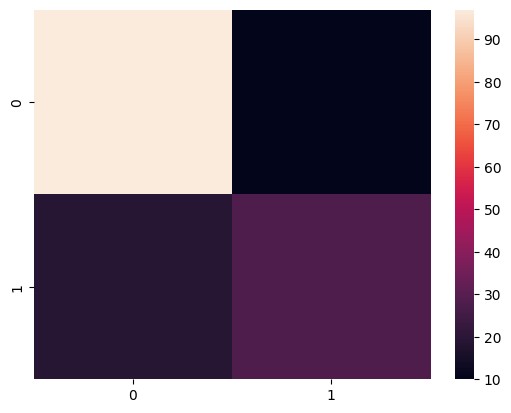

In [78]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))